In [295]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd

In [296]:
#Load the train and test data
from numpy import genfromtxt


train_data = genfromtxt('./train_data.txt', delimiter=' ')
test_data = genfromtxt('./train_data.txt', delimiter=' ')

x_train = train_data[:,:2]
y_train = train_data[:,2:3][:,0]

x_test = test_data[:,:2]
y_test = test_data[:,2:3][:,0]

# Question 3 [60 points]: Linear Classifier Implementations 

a) [35 points: 15 points for each model, 5 points for evaluation] Using the provided dataset in the notebook, implement the perceptron and linear discriminant analysis (LDA) algorithms (use NumPy, Pandas) to classify the dataset. Then, report the accuracy of trained models. 

In [297]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.threshold = None
    
  def model(self, x):
    return np.where(x >= self.threshold, 1, 0)
  
  def predict(self, X):
    #Predict values for the input X using the 'model' function above and store it in Y
    Y = self.model(np.dot(X, self.w))    
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lR = 1):
    number_of_samples, number_of_features = X.shape
    self.w = np.zeros(number_of_features)
    self.threshold = 0.5

    # Since Y has 3 classes in the given data, I am reducing it to two since our activation function can only work with 2
    Y = np.array([1 if i > 0 else 0 for i in Y])

    accuracy = {}
    max_accuracy = 0
    wt_matrix = []

    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.predict(x)

        if y == 1 and y_pred == 0:
          update = lR * (y - y_pred)
          self.w += update * x
          self.threshold += update
      
        elif y == 0 and y_pred == 1:
          update = lR * (y - y_pred)
          self.w += update * x
          self.threshold += update
          
      wt_matrix.append(self.w)    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.threshold
    #checkpoint (Save the weights and b value)
    self.w = chkptw
    self.threshold = chkptb
        
    print("Test accuracy of perceptron : ", max_accuracy)
    #plot the accuracy values over epochs
    plt.plot(accuracy.values())
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.ylim([0, 1])
    plt.show()
    
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)


Test accuracy of perceptron :  0.336


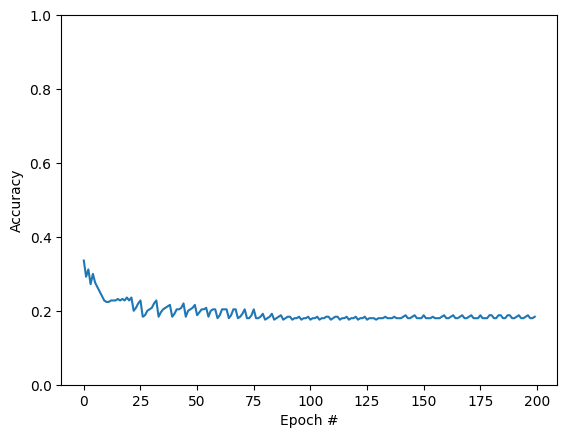

In [298]:
perceptron = Perceptron()

wt_matrix = perceptron.fit(x_train, y_train, 200, 0.001)

In [299]:
import numpy as np

class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        number_of_samples, number_of_features = X.shape
        # first we need to calculate within class scattering and then between multiple classes how scattering is
        SCATTER_WITHIN = np.zeros(shape=(number_of_features, number_of_features))
        SCATTER_BETWEEN = np.zeros(shape=(number_of_features, number_of_features))

        # For more than two scatters we would need a central mean with which we can compare our means with
        # as in LDA it tries to increase the space among mean and decrease the width / scatter
        universal_mean_of_data = np.mean(X, axis=0)

        # 0, 1, 2 whatever
        labels = np.unique(y)

        for i in range(len(labels)):
            mean_of_current_class = np.mean(X[y == labels[i]], axis=0)
            samples_that_belong_to_this_class = X[y == labels[i]]
            SCATTER_WITHIN += (samples_that_belong_to_this_class - mean_of_current_class).T.dot((X[y == labels[i]] - mean_of_current_class))
            number_of_samples_in_current_class = len(samples_that_belong_to_this_class)
            temp = (mean_of_current_class - universal_mean_of_data).reshape(number_of_features, 1)
            SCATTER_BETWEEN += number_of_samples_in_current_class * (temp).dot(temp.T)
        
        eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(SCATTER_WITHIN).dot(SCATTER_BETWEEN))
        self.linear_discriminants = eigen_vectors[0 : self.n_components]

    def transform(self, X):
        # We can project the data using the obtained eigen vectors
        transformed_data = np.dot(X, self.linear_discriminants.T)
        return transformed_data

b)	[5 points] Use the provided test dataset, general and evaluate the models. 

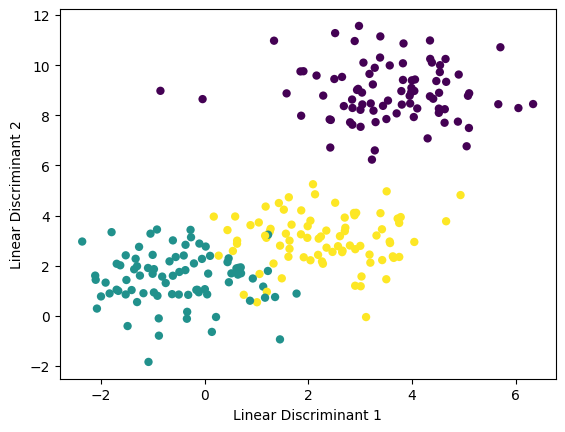

In [300]:
lda = LDA(2)
lda.fit(x_train, y_train)
X_projected = lda.transform(x_test)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y_test, edgecolor="none")

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.show()

c)	[15 pts] Implement models (perceptron, LDA, and logistic regression) using Scikit-learn. 

In [301]:
# Perceptron
from sklearn.linear_model import Perceptron

p = Perceptron()
p.fit(x_train, y_train)
predictions = p.predict(x_test)
actual_values = y_test

number_of_correct_predictions = 0
for i in range(len(actual_values)):
    if predictions[i] == y_test[i]:
        number_of_correct_predictions += 1
    
print("Accuracy is : ", (number_of_correct_predictions / len(actual_values)))

Accuracy is :  0.884


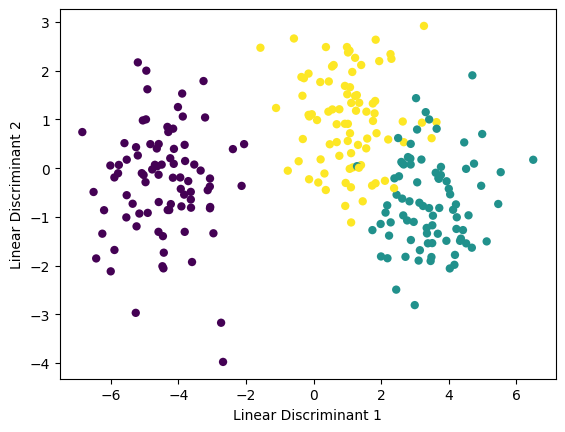

In [302]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDASk

lda = LDASk(n_components=2)
lda.fit(x_train, y_train)
X_projected = lda.transform(x_test)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y_test, edgecolor="none")

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.show()


In [303]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lR = LogisticRegression()
lR.fit(x_train, y_train)
ans = lR.predict(x_test)

number_of_correct_predictions = 0
for i in range(len(actual_values)):
    if ans[i] == y_test[i]:
        number_of_correct_predictions += 1
    
print(number_of_correct_predictions, len(actual_values))
logistic_regression_accuracy = (number_of_correct_predictions / len(actual_values))
print("Accuracy is : ", logistic_regression_accuracy)

241 250
Accuracy is :  0.964


d)	[5 points] Compare the weights obtained and the accuracies of trained models. Did you expect weights to be the same? Explain why or why not? 

In [304]:
# I expected the weights to be different because the threshold values and weights initially considered
# could be different in sklearn and my implementation.

# Question 4 [20 points]: Linear Regression and regularization

Suppose we decided to reject the linear model for the housing dataset discussed in linear regression lecture (the second model with all features after the preprocessing). Then, we are going to implement a new model that is less complex (lower number of features) and outperform (lower RMSE). 

a)	[10 points] Retrain the dataset. In the new trained dataset, same feature engineering for the continuous features is not allowed while the discrete features may be used as they are. For each process, explain explicitly the reason of work. 

In [305]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

df = pd.read_csv('./Housing_scaled_01.csv')
Y = df['median_house_value']
features = list(set(df.columns.tolist()[3:])-set(['median_house_value']))
X = df[features]

# Normalizing the data
X = (X - X.mean(axis=0)) / X.std(axis=0)
p = PCA(n_components=12)
p.fit(X)
transform = p.transform(X)
X = pd.DataFrame(transform)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [307]:
def lr_model(xT,xt,yT,yt,features):
    """"
    xT: Original Train X, yT: Original Train Y
    xt: Original Test X, yt: Original Test Y
    features: features in train dataset
    """
    XT,Xt = xT, xt
    lr = LinearRegression()                     #Make a model
    lr.fit(XT,yT)                               #Fit a train data
    y_train_pred = lr.predict(XT)               #Predict the train data
    rmse = mean_squared_error(yT,y_train_pred)  #Calculate root-mean-squared-error
    mae = mean_absolute_error(yT,y_train_pred)  #Calculate mean-absolute-error
    rsq = r2_score(yT,y_train_pred)             #Calculate R^2
    print(f'train: rmse={rmse}, mae={mae}, R^2={rsq}')
    y_test_pred = lr.predict(Xt)                #Predict the test data
    rmse = mean_squared_error(yt,y_test_pred)
    mae = mean_absolute_error(yt,y_test_pred)
    rsq = r2_score(yt,y_test_pred)             #Calculate R^2
    print(f'train: rmse={rmse}, mae={mae}, R^2={rsq}')
    train_res = yT - y_train_pred               #Calcualte residuals
    test_res = yt - y_test_pred
    plt.scatter(yT,train_res,alpha=0.4,label='train') #Plot residuals
    plt.scatter(yt,test_res,alpha=0.4, label='test')
    plt.hlines(y=0,xmin=yT.min()-2,xmax=yT.max()+2,linestyles='--',color='r')
    plt.legend()
    plt.show()
    return lr

train: rmse=8.248320347732434, mae=2.222371594965574, R^2=0.7091271011391393
train: rmse=7.998432190512114, mae=2.1978333940758477, R^2=0.7238385250126265


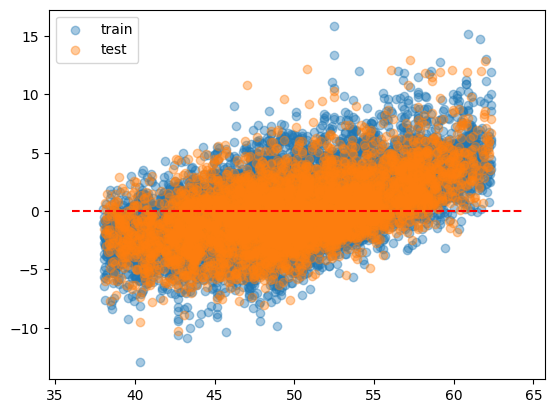

In [308]:
lr_all = lr_model(X_train,X_test,y_train,y_test,features)
# Previousky we applied correlation in the class, so here I am using PCA for data dimensionality reduction (feature engineering).
# As the number of the components in PCA decrease the RMSE is increasing respectively

b)	[10 points] Suppose the worst scenario is when the RMSE of new model is higher but within 5% with the same number of features that the original model had. Train five different models (with or without regularizations) and report the results. Select the best model among five models and explain why. 

In [309]:
# RMSE is dependent on the features selected and data-preprocessing
# I found that linear regression with correlation for feature engineering worked best for me
# I think that reducing dimensions based on correlation makes sense instead of taking all the features and 
# mapping them into different space, even then the original features have their impact unnecessarily on
# the new features, where as in co-relation we just get rid of features that are not related to our
# target Y.